In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, lognorm
import numpy as np
import ast

In [2]:
df = pd.read_csv("../results/simulation_results_system_4_1.csv", sep=r",(?![^\[]*\])")

/var/folders/3j/3p_dzlvs1nsdfryf9hm7gjnr0000gn/T/ipykernel_6810/3683106496.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../results/simulation_results_system_4_1.csv", sep=r",(?![^\[]*\])")


In [3]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Patient ID', 'CTAS Level', 'Tests', 'Arrival Time', 'Departure Time',
       'LOS', 'Triage Waiting Time', 'ED Waiting Time',
       'Medication Waiting Time', 'Inpatient Waiting Time',
       'Triage Waiting Room Length', 'ED Waiting Room Length',
       'Medication Waiting Room Length', 'Inpatient Waiting Room Length'],
      dtype='object')

In [4]:
los_vals = []

for items in df["LOS"]:
    if items > 0:
        los_vals.append(items/60)
        
print(len(los_vals))

98760


In [5]:
print(min(los_vals), max(los_vals))

0.10359808058747148 4.0180206389295865


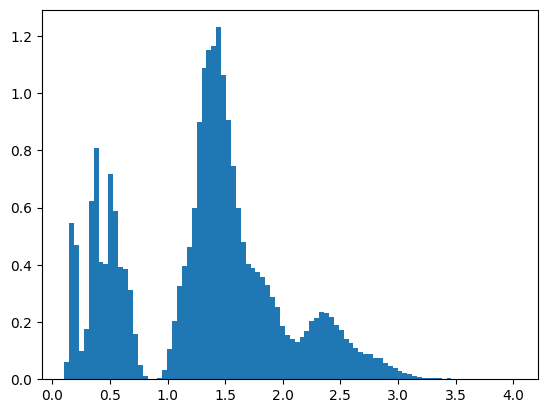

In [6]:
plt.hist(los_vals, density=True, bins="auto")
plt.show()

In [7]:
los_vals_ctas_i_iii = []
los_vals_ctas_iv_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) in [1, 2, 3]:
            los_vals_ctas_i_iii.append(los)
        elif int(ctas) in [4, 5]:
            los_vals_ctas_iv_v.append(los)
        
print(len(los_vals_ctas_i_iii), len(los_vals_ctas_iv_v))

59217 39543


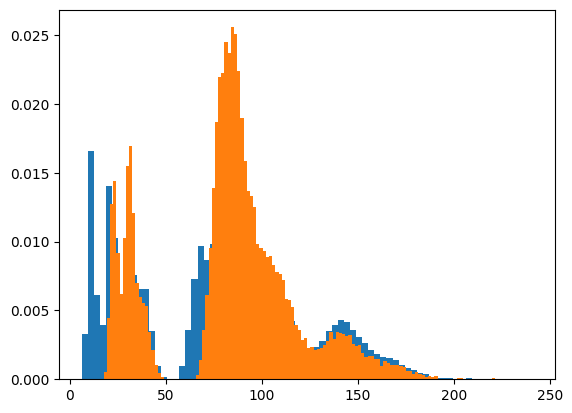

In [8]:
plt.hist(los_vals_ctas_i_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv_v, density=True, bins="auto")
plt.show()

In [9]:
los_vals_ctas_i = []
los_vals_ctas_ii = []
los_vals_ctas_iii = []
los_vals_ctas_iv = []
los_vals_ctas_v = []

for ctas, los in zip(df["CTAS Level"], df["LOS"]):
    if los > 0:
        if int(ctas) == 1:
            los_vals_ctas_i.append(los)
        elif int(ctas) == 2:
            los_vals_ctas_ii.append(los)
        elif int(ctas) == 3:
            los_vals_ctas_iii.append(los)
        elif int(ctas) == 4:
            los_vals_ctas_iv.append(los)
        elif int(ctas) == 5:
            los_vals_ctas_v.append(los)
        
print(len(los_vals_ctas_i), len(los_vals_ctas_ii), len(los_vals_ctas_iii), 
      len(los_vals_ctas_iv), len(los_vals_ctas_v))

19617 19913 19687 19751 19792


In [10]:
avg_los_ctas_i = sum(los_vals_ctas_i)/len(los_vals_ctas_i)
avg_los_ctas_ii = sum(los_vals_ctas_ii)/len(los_vals_ctas_ii)
avg_los_ctas_iii = sum(los_vals_ctas_iii)/len(los_vals_ctas_iii)
avg_los_ctas_iv = sum(los_vals_ctas_iv)/len(los_vals_ctas_iv)
avg_los_ctas_v = sum(los_vals_ctas_v)/len(los_vals_ctas_v)

print(avg_los_ctas_i/60, avg_los_ctas_ii/60, avg_los_ctas_iii/60, avg_los_ctas_iv/60, avg_los_ctas_v/60)

0.7285590909774732 1.5739142581257757 1.5647171482628244 1.563591555207066 1.2217276679938653


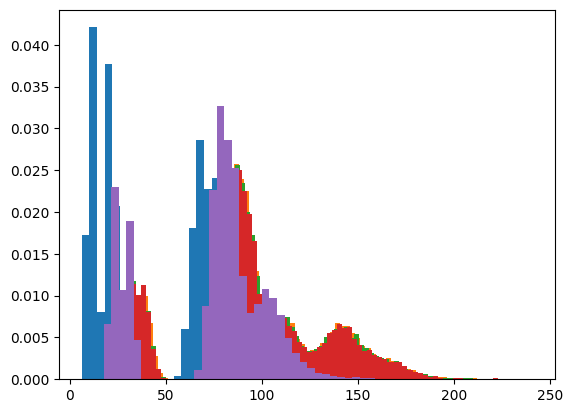

In [11]:
plt.hist(los_vals_ctas_i, density=True, bins="auto")
plt.hist(los_vals_ctas_ii, density=True, bins="auto")
plt.hist(los_vals_ctas_iii, density=True, bins="auto")
plt.hist(los_vals_ctas_iv, density=True, bins="auto")
plt.hist(los_vals_ctas_v, density=True, bins="auto")
plt.show()